# Projectile

Introduction to optimization and operations research
Michel Bierlaire


In [2]:

from matplotlib import pyplot as plt


A projectile is launched vertically with an initial speed of 50 meters per second, assuming no air resistance.
We want to determine how long it takes to reach its maximum altitude and what that altitude is.
Use the [scipy.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
function to solve this problem by finding the time that maximizes the height.

Import necessary packages.

In [ ]:
from scipy.optimize import minimize

from teaching_optimization.plot_function import plot_function

First implement the calculation of the altitude of the projectile using the formula for uniformly accelerated
movement:  $$f(t) = x_o + v_0 t -\frac{g}{2} t^2,$$
where $x_0$ is the initial altitude, $v_0$ the initial speed, and $g$ the acceleration due
to gravity.

Define a constant.

In [4]:
GRAVITY = 9.81

Write a function to calculate the height of the projectile, using the formula.

In [ ]:
def height(time: float, initial_altitude: float, initial_speed: float) -> float:
    """
    Calculate the height of the projectile, using the formula.

    :param time: time at which we need the height.
    :param initial_altitude: initial altitude x_0.
    :param initial_speed: initial speed v_0.
    :return: height.
    """
    return initial_altitude + initial_speed*time - GRAVITY/2*time**2

Define the objective function. The "decision" variable is the time.

In [12]:
def objective_function(point: float) -> float:
    """Objective function of the optimization problem.


    :param point: decision variable.
    """
    return -height(time=point, initial_altitude=0, initial_speed=50)

Plot the objective function.

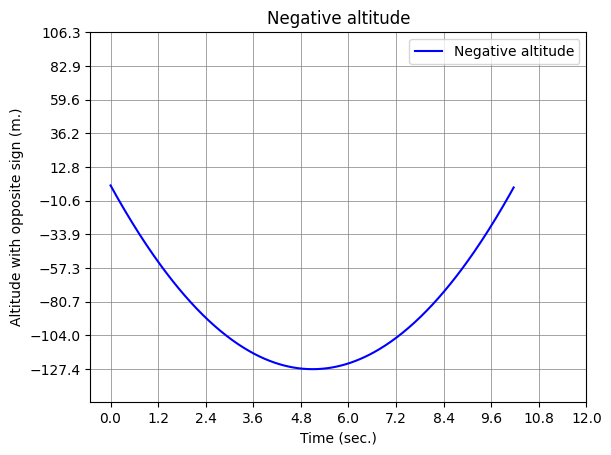

In [13]:
plot_function(
    my_function=objective_function,
    label='Negative altitude',
    x_label='Time (sec.)',
    y_label='Altitude with opposite sign (m.)',
    x_min=0,
    x_max=12,
    y_min=-150,
    y_max=0,
)
plt.show()

Initial solution

In [ ]:
x0 = 0.0

Run the algorithm.

In [ ]:
optimization_result = minimize(fun=objective_function, x0 = x0)

Print the raw results. Note that 'success' is set to True.

In [16]:
print(optimization_result)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -127.42099898063199
        x: [ 5.097e+00]
      nit: 3
      jac: [ 9.537e-07]
 hess_inv: [[ 1.019e-01]]
     nfev: 8
     njev: 4


Print the solution with 3 significant digits. We expect:

- Elapsed time:     5.1 sec.
- Altitude reached: 127 m.

In [17]:
print(f'Elapsed time:     {optimization_result.x[0]:.3g} sec.')
print(f'Altitude reached: {-optimization_result.fun:.3g} m.')

Elapsed time:     5.1 sec.
Altitude reached: 127 m.
